In [2]:
using PyPlot;

## Exercise 1

Given a force that varies with time according to $F=2t^2$, and with the initial condition at time zero, $x(0) = \pi$, use Aristotle's law to find $x(t)$ at all times

## Solution

Aristotle's law would be $F = m \dot{x}(t)$ so 
$$
\begin{align*}
x(t) &= \frac{1}{m}\int 2\tau^2\, \mathrm{d}\tau \\
&= \frac{1}{m}\frac{2}{3}t^3 + C
\end{align*}
$$

Using $x(0) = \pi$ we have $C = \pi$

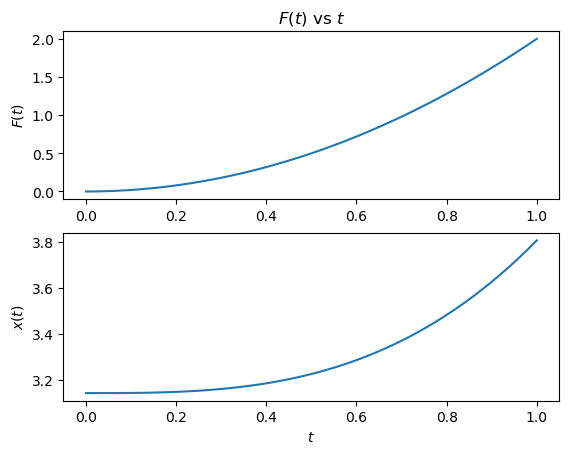

In [3]:
m = 1
t_vals = LinRange(0, 1, 100)
f_vals = 2 * t_vals .^ 2
x_vals = 1/m * 2/3 * t_vals .^ 3 .+ pi

subplot(211);
plot(t_vals, f_vals);
title(L"$F(t)$ vs $t$");
ylabel(L"F(t)")

subplot(212);
plot(t_vals, x_vals);
xlabel(L"t");
ylabel(L"x(t)");



## Exercise 3

Show by differentiation that this satisfies the equation of motion

$$
\begin{align*}
\dot{z} &= \frac{d}{dt}\left(z_0 + v_z(0)t+\frac{F_z}{2m}t^2\right)\\
&= v_z(0)t+\frac{F_z}{m}t\\
\ddot{z} &= \frac{d}{dt}\left(v_z(0)+\frac{F_z}{m}t\right)\\
&= \frac{F_z}{m}\\
\end{align*}
$$

## Exercise 4

Show by differentiation that that the general solution to $\ddot{x}(t) = -\omega^2 x(t)$ is given in terms of two constants $A$ and $B$ by 
$$x(t) = A\cos(\omega t) + B\sin(\omega t)$$
Determine the initial position and velocity at time $t=0$ in terms of $A$ and $B$

$$
\begin{align*}
\dot{x} &= \frac{d}{dt}\left(A\cos(\omega t) + B\sin(\omega t)\right)\\
&= -A\omega \sin(\omega t) + B\omega \cos(\omega t)\\
\ddot{x} &= \frac{d}{dt}\left(-A\omega \sin(\omega t) + B\omega \cos(\omega t)\right)\\
&= -A\omega^2 \cos(\omega t) - B \omega^2 \sin(\omega t)\\
&= -\omega^2 (A\cos(\omega t) + \sin(\omega t))\\
&= -\omega^2 x(t)\\
\end{align*}
$$

$$
\begin{align*}
x(0) &= A \cos(0) + B\sin(0)\\
x_0 &= A\\
\dot{x}(0)&= -A\omega\sin(0)+B\omega\cos(0)\\
v_0 &= B\omega
\end{align*}
$$

The equations of motion are then
$$x(t) = x_0\cos(\omega t) + \frac{v_0}{\omega} \sin(\omega t)$$

# Partial Differentiation

# Exercise 1

Compute all first and second partial derivatives - including mixed derivatives - of the following functions

1. $f(x,y) = x^2+y^2$
2. $g(x,y) = \sin(xy)$
3. $h(x,y) = \frac{x}{y}e^{x^2+y^2}$
4. $k(x,y) = e^x\cos y$

## Solution

1. The total derivative of $f(x,y)$ is 
$$Df = 
\begin{bmatrix}
2x & 2y\\
\end{bmatrix}
$$
The hessian is 
$$
D \nabla f = 
\begin{bmatrix}
2 && 0\\
0 && 2\\
\end{bmatrix}
$$

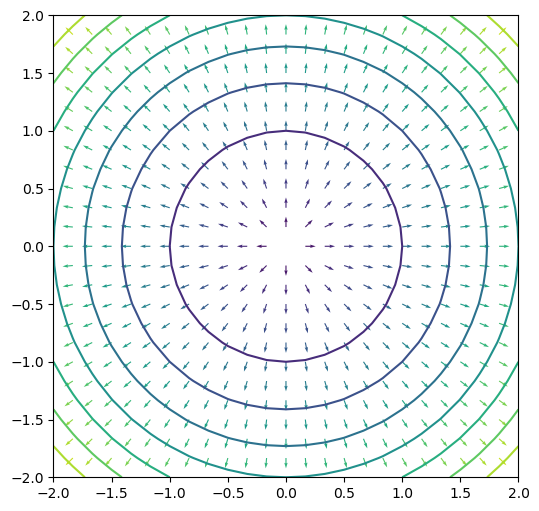

PyObject <matplotlib.quiver.Quiver object at 0x14b783898>

In [75]:
x_vals = LinRange(-2, 2, 25)
y_vals = LinRange(-2, 2, 25)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]
Z_mesh = X_mesh .^ 2 + Y_mesh .^ 2

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

dx = 2 * x_plot
dy = 2 * y_plot

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

contour(X_mesh, Y_mesh, Z_mesh);
quiver(x_plot, y_plot, 
    dx ./ grad_field_norms, dy ./ grad_field_norms, 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

2. The total derivative of $g(x,y)$ is 
$$Dg = 
\begin{bmatrix}
y\cos(xy) & x\cos(xy)\\
\end{bmatrix}$$
The hessian is 
$$
D \nabla g = 
\begin{bmatrix}
-y^2\sin(xy) & \cos(xy) - x\sin(xy)\\
\cos(xy) - x\sin(xy) & -x^2\sin(xy)\\
\end{bmatrix}
$$

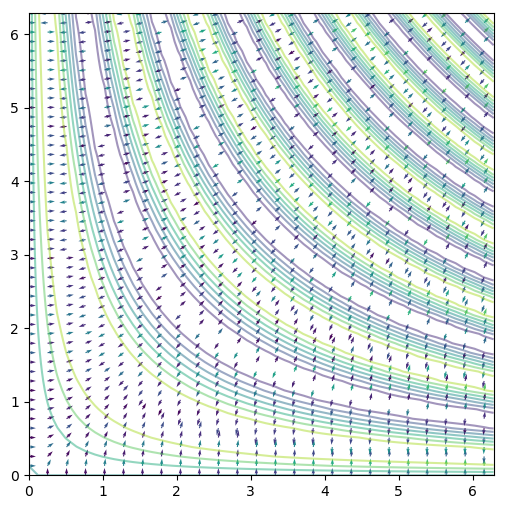

PyObject <matplotlib.quiver.Quiver object at 0x14a1b9748>

In [84]:
x_vals = LinRange(0, 2*pi, 50)
y_vals = LinRange(0, 2*pi, 50)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]

Z_mesh = sin.(X_mesh .* Y_mesh)

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

dx = y_plot .* cos.(x_plot .* y_plot)
dy = x_plot .* cos.(x_plot .* y_plot)

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

contour(X_mesh, Y_mesh, Z_mesh, alpha=0.5)
quiver(X_mesh[1:2:end], Y_mesh[1:2:end], 
    (dx ./ grad_field_norms)[1:2:end], (dy ./ grad_field_norms)[1:2:end], 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

3. The total derivative of $h(x,y)$ is 
$$
\begin{align*}
Dh &= 
\begin{bmatrix}
\frac{1}{y}e^{x^2+y^2}+\frac{2x^2}{y}e^{x^2+y^2} & \frac{2xy}{y}e^{x^2+y^2} - \frac{x}{y^2}e^{x^2+y^2}  \\
\end{bmatrix}\\
&=
\begin{bmatrix}
\frac{1}{y}e^{x^2+y^2}\left(1+ 2x^2\right) & xe^{x^2+y^2} \left(2 - \frac{1}{y^2}\right) \\
\end{bmatrix}
\end{align*}
$$
The hessian is 
$$
D \nabla h = 
\begin{bmatrix}
\frac{2x}{y}e^{x^2+y^2} (3+2x^2) & (1+2x^2)\left(2 - \frac{1}{y^2}\right)e^{x^2+y^2}\\
(1+2x^2)\left(2 - \frac{1}{y^2}\right)e^{x^2+y^2} & 2xe^{x^2+y^2}\left(y \left(2 - \frac{1}{y^2}\right) + \frac{1}{y^3}\right)\\
\end{bmatrix}
$$

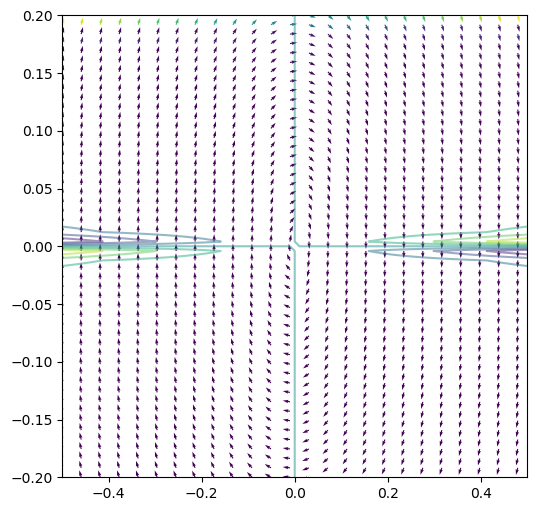

In [110]:
x_vals = LinRange(-0.5, 0.5, 50)
y_vals = LinRange(-0.2, 0.2, 50)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]
Z_mesh = X_mesh ./ Y_mesh .* exp.(X_mesh .^ 2 + Y_mesh .^ 2)

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

dx = 1 ./ y_plot .* exp.(x_plot .^ 2 + y_plot .^ 2) .* (1 .+ 2 * x_plot .^ 2)
dy = x_plot .* exp.(x_plot .^ 2 + y_plot .^ 2) .* (2 .- 1 ./ y_plot .^ 2)

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

contour(X_mesh, Y_mesh, Z_mesh, level=10, alpha=0.5);
quiver(x_plot[1:2:end], y_plot[1:2:end], 
    (dx ./ grad_field_norms)[1:2:end], (dy ./ grad_field_norms)[1:2:end], 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

4. The total derivative of $k(x,y)$ is 
$$Dk = 
\begin{bmatrix}
e^x\cos(y) & -e^x\sin(y)\\
\end{bmatrix}$$
The hessian is 
$$
D \nabla k = 
\begin{bmatrix}
e^x\cos(y) & -e^x\sin(y)\\
-e^x\sin(y) & -e^x\cos(y)\\
\end{bmatrix}
$$

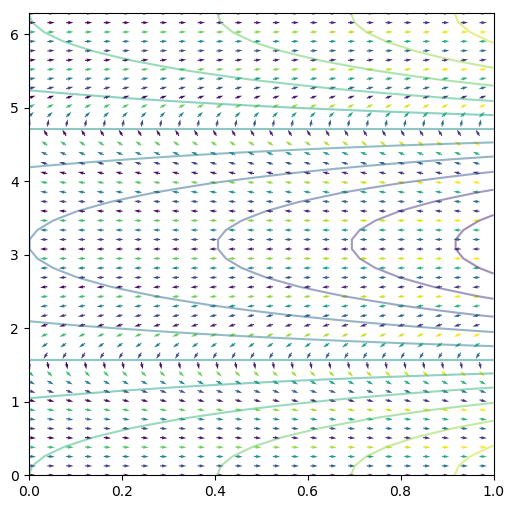

In [99]:
x_vals = LinRange(0, 1, 100)
y_vals = LinRange(0, 2*pi, 50)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]

Z_mesh = exp.(X_mesh) .* cos.(Y_mesh)

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

dx = exp.(x_plot) .* cos.(y_plot)
dy = -exp.(x_plot) .* sin.(y_plot)

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

contour(X_mesh, Y_mesh, Z_mesh, alpha=0.5, levels=10)
quiver(x_plot[1:4:end], y_plot[1:4:end], 
    (dx ./ grad_field_norms)[1:4:end], (dy ./ grad_field_norms)[1:4:end], 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

# Exercise 2

Consider the points $(x=\pi/2,y=-\pi/2)$, $(x=-\pi/2, y= \pi/2)$, $(x=-\pi/2,y=-\pi/2)$. Are these points stationary points of the following functions?

1. $F(x,y) = \sin x + \sin y$
2. $G(x,y) = \cos x + \cos y$


## Solution

1. The gradient is given by 
$$\nabla F = 
\begin{bmatrix}
\cos x \\
\cos y
\end{bmatrix}
$$
The stationary points are of the form $(n\pi/2, m\pi/2)$. The Hessian is given by 
$$
\nabla^2 F = 
\begin{bmatrix}
-\sin x & 0\\
0 & -\sin y\\
\end{bmatrix}
$$
$(\pi/2, -\pi/2)$ can easily be seen to be a saddle point since it has hessian
$$
\nabla^2 F = 
\begin{bmatrix}
-1 & 0\\
0 & 1\\
\end{bmatrix}
$$
$(-\pi/2, \pi/2)$ is also a saddle point since it has hessian
$$
\nabla^2 F = 
\begin{bmatrix}
1 & 0\\
0 & -1\\
\end{bmatrix}
$$
$(-\pi/2, -\pi/2)$ is a minimum since it has hessian
$$
\nabla^2 F = 
\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}
$$

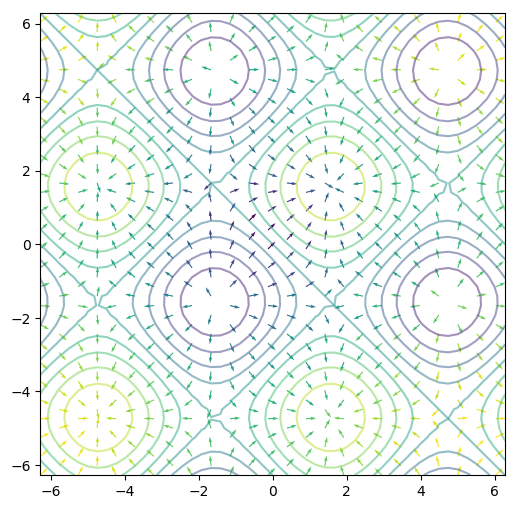

In [113]:
x_vals = LinRange(-2*pi, 2*pi, 50)
y_vals = LinRange(-2*pi, 2*pi, 50)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]

Z_mesh = sin.(X_mesh) .+ sin.(Y_mesh)

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

dx = cos.(x_plot)
dy = cos.(y_plot)

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

contour(X_mesh, Y_mesh, Z_mesh, alpha=0.5, levels=10)
quiver(x_plot[1:4:end], y_plot[1:4:end], 
    (dx ./ grad_field_norms)[1:4:end], (dy ./ grad_field_norms)[1:4:end], 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

2. The gradient is given by 
$$\nabla F = 
\begin{bmatrix}
-\sin x \\
-\sin y
\end{bmatrix}
$$
The stationary points are of the form $(n\pi, m\pi)$. The Hessian is given by 
$$
\nabla^2 F = 
\begin{bmatrix}
-\cos x & 0\\
0 & -\cos y\\
\end{bmatrix}
$$
The stationary points are of the form $(n\pi, m\pi)$

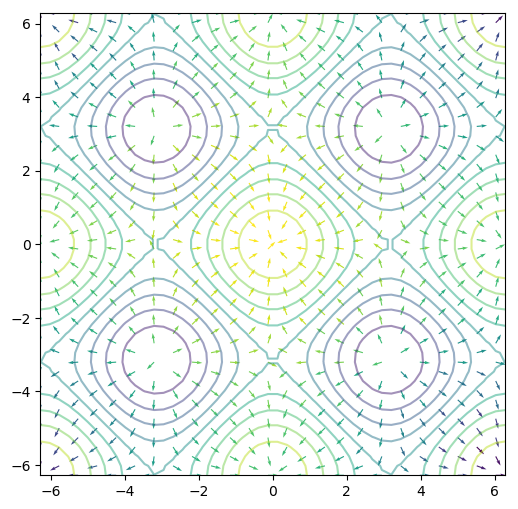

In [114]:
x_vals = LinRange(-2*pi, 2*pi, 50)
y_vals = LinRange(-2*pi, 2*pi, 50)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]

Z_mesh = cos.(X_mesh) .+ cos.(Y_mesh)

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

dx = -sin.(x_plot)
dy = -sin.(y_plot)

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

contour(X_mesh, Y_mesh, Z_mesh, alpha=0.5, levels=10)
quiver(x_plot[1:4:end], y_plot[1:4:end], 
    (dx ./ grad_field_norms)[1:4:end], (dy ./ grad_field_norms)[1:4:end], 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");